<a href="https://colab.research.google.com/github/uminor/vec2pat/blob/master/pattern2vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# tensorflow のラッパーとなるライブラリ keras をインストール
!pip install -q keras

data size :  55
[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0

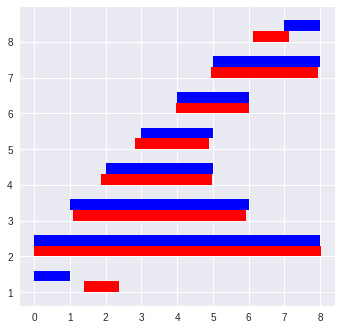

In [0]:
import tensorflow as tf
import keras
from keras.optimizers import SGD
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import sys
import time

dim = 10
multiple = 7

# generate whole data
def generate_whole_data():
  inpt, outpt = [], []
  c = 0
  for frm in range(0, dim):
    for to in range(frm, dim):
      x = np.zeros(dim)

      for j in range(frm, to+1):
        x[j] = 1

      inpt.append([frm, to])
      outpt.append(x)
      c = c + 1
      
  inpt  = np.array(inpt)
  outpt = np.array(outpt)
  print("data size : ", c)
  return inpt, outpt

# インデックスが m の倍数の要素のリスト
def select_by_multiple(lis, m):
  o = []
  for i, a in enumerate(lis):
    if i % m == 0:
      o.append(a)
  return o

# インデックスが m の倍数以外の要素のリスト
def reject_by_multiple(lis, m):
  o = []
  for i, a in enumerate(lis):
    if i % m != 0:
      o.append(a)
  return o
      
# generate sample data
def generate_data(num):
  inpt, outpt = [], []

  for i in range(0, samples):
    x = np.zeros(dim)
    frm = randint(0, dim)
    to  = randint(frm, dim)
    
    for j in range(frm, to+1):
      x[j] = 1

    inpt.append([frm, to])
    outpt.append(x)

  inpt  = np.array(inpt)
  outpt = np.array(outpt)
  return inpt, outpt

#i_train, o_train = generate_data(samples)
o_train , i_train, = generate_whole_data() # reverse i-o

i_train = np.array(reject_by_multiple(i_train, 7))
o_train = np.array(reject_by_multiple(o_train, 7))

print(i_train)
print(o_train)

from keras.layers import Dense, Activation
model = keras.models.Sequential()

# neural network model parameters
hidden_units = 20
layer_depth = 1
act = 'sigmoid'
bias = True

# first hidden layer
model.add(Dense(units = hidden_units, input_dim = dim, use_bias = bias))
model.add(Activation(act))


model.add(Dense(units = int(hidden_units), use_bias = bias))
model.add(Activation(act))
model.add(Dense(units = int(hidden_units), use_bias = bias))
model.add(Activation(act))

# output layer
model.add(Dense(units = 2, use_bias = bias))
model.add(Activation('linear'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss = 'mean_squared_error', optimizer = sgd)

# training
ep = 3000 # default

start_fit = time.time()

model.fit(i_train, o_train, epochs = ep, verbose = 0)
elapsed = time.time() - start_fit
print("elapsed = {:.1f} sec".format(elapsed))

# predict
o_true, i_test = generate_whole_data()  # reverse i-o

i_test = np.array(select_by_multiple(i_test, multiple))
o_true = np.array(select_by_multiple(o_true, multiple))

o_predict = model.predict(i_test)
o_true = np.array(o_true)

# Easy evaluation
def fmt(n):
  return '{0:>5.2f}'.format(round(n, 2))

ax = plt.axes()  

c = 0
for (it, op, ot) in zip(i_test, o_predict, o_true):
  print(c, it)
  c = c + 1
  pv = list(op)
  tv = list(ot)
  print(list(map(fmt, pv)),"：推定したベクトル")
  print(list(map(fmt, tv)),"：真のベクトル")

  r = pch.Rectangle(xy=(pv[0], c), width=pv[1]-pv[0]+1.0, height=0.3, fc='#FF0000', fill=True)
  ax.add_patch(r)
  r = pch.Rectangle(xy=(tv[0], c+0.3), width=tv[1]-tv[0]+1.0, height=0.3, fc='#0000FF', fill=True)
  ax.add_patch(r)

plt.axis('scaled')
ax.set_aspect('equal')
plt.show()  
